# Promolecule properties: Introduction

AtomDB provides basic functionality to compute promolecular properties from the atomic data. The tool is called `promolecule`.
The module offers evaluation of intensive and extensive properties with the tool function `make_promolecule`.


## Building a promolecule

Creating a promolecule is as simple as providing the list of elements and coordinates defining the molecule as is shown here for the Berillium dimer. Additionally, database to use as source of atomic properties is required. The following block of code shows how to create a promolecule for the Berillium dimer. This will be used for the rest of the examples in this notebook.

In [1]:
import numpy as np
from atomdb import make_promolecule


# Atomic number of each center
atnums = [4, 4]

# Spatial coordinates of each center
atcoords = np.array( [
    [-1., 0., 0.],
    [1., 0., 0. ],
], dtype=float)


# Make promolecule instance
be2_promol = make_promolecule(atnums=atnums, coords=atcoords, dataset='slater')

print("Be_{2} promolecule:")
print("Atomic numbers:\n", atnums)
print("Atomic coordinates:\n", atcoords)

Be_{2} promolecule:
Atomic numbers:
 [4, 4]
Atomic coordinates:
 [[-1.  0.  0.]
 [ 1.  0.  0.]]


## Computing (pro)molecular properties

In the following examples, we will show how are classified the different properties that can be computed with the `promolecule` module and compute some of them.


### Extensive (global) properties

Extensive properties are those that depend on the number of atoms in the molecule. Even more, when an extensive property do not depend on the point in which it is computed, it is called a global property. The mass of the molecule is an example of a global extensive property. Extensive global properties are computed following the next equation:

\begin{equation*}
P^{mol}_{ext} = \sum^{N_{atoms}}_{i=1} c_{i} P^{atom}_i
\end{equation*}

where $P^{atom}_i$ are the atomic properties of the atoms participating in the linear combination and $c_{i}$ are the coefficients of the linear combination. The sum is over all the different states considered for all of the atoms in the molecule.


In [2]:
print(f'Mass of Be2: {be2_promol.mass()} a.u.')
print(f'Charge of Be2: {be2_promol.charge()}')
print(f'Energies of Be2: {be2_promol.energy()} a.u.')
print(f'Number of electrons in Be2: {be2_promol.nelec()}')


Mass of Be2: 32856.40962869897 a.u.
Charge of Be2: 0.0
Energies of Be2: -29.146046334 a.u.
Number of electrons in Be2: 8.0


### Extensive (local) properties

These are properties that depend on the point in which they are computed and the size of the molecule. The electron density is an example of a local extensive property. The next block shows how to obtain different extensive local properties for the Berillium dimer. For this we are going to plot the electron density and and gradient of the electron density.

In [3]:
# make mesh grid for plotting
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

points = np.array([X.flatten(), Y.flatten(), Z.flatten()]).T

# Compute the electron density, its gradient and the kinetic energy density
rho = be2_promol.density(points)
grad_rho = be2_promol.gradient(points)
ked = be2_promol.ked(points)

print(f'Electron density shape: {rho.shape}')
print(f'Electron density max: {np.max(rho)}')
print(f'Electron density min: {np.min(rho)}\n')
print(f'Gradient of electron density shape: {grad_rho.shape}')
print(f'Gradient of electron density max: {np.max(grad_rho)}')
print(f'Gradient of electron density min: {np.min(grad_rho)}\n')
print(f'Kinetic energy density shape: {ked.shape}')
print(f'Kinetic energy density max: {np.max(ked)}')
print(f'Kinetic energy density min: {np.min(ked)}')


Electron density shape: (10000,)
Electron density max: 27.807601119577175
Electron density min: 0.002500381056096827

Gradient of electron density shape: (10000, 3)
Gradient of electron density max: 220.84844004067693
Gradient of electron density min: -220.84844004067693

Kinetic energy density shape: (10000,)
Kinetic energy density max: 28.694973110329048
Kinetic energy density min: 0.10910585317591645


### Visualizing density properties

The following blocks of code show how to visualize the computed local extensive properties (electron density, gradient of the electron density, and kinetic energy density) for the Berillium dimer. The visualization is done using the `plotly` library.

#### Electron density and gradient along the bond axis

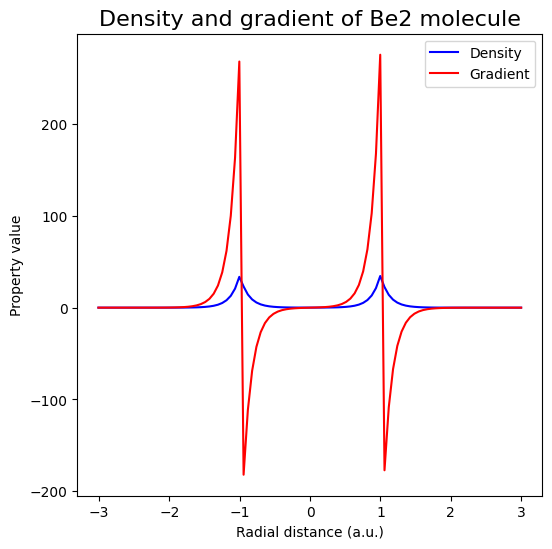

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
rad_grid = np.linspace(-3.01, 3, 100)
promol_dens = be2_promol.density(np.array([rad_grid, np.zeros_like(rad_grid), np.zeros_like(rad_grid)]).T)
promol_grad = be2_promol.gradient(np.array([rad_grid, np.zeros_like(rad_grid), np.zeros_like(rad_grid)]).T)

ax.plot(rad_grid, promol_dens, color="blue", label="Density")
ax.plot(rad_grid, promol_grad[:,0], color="red", label="Gradient")

ax.set_xlabel("Radial distance (a.u.)")
ax.set_ylabel("Property value")

ax.legend()
ax.set_title("Density and gradient of Be2 molecule", fontsize=16)
plt.show()

#### Electron density and kinetic energy density along a molecular plane

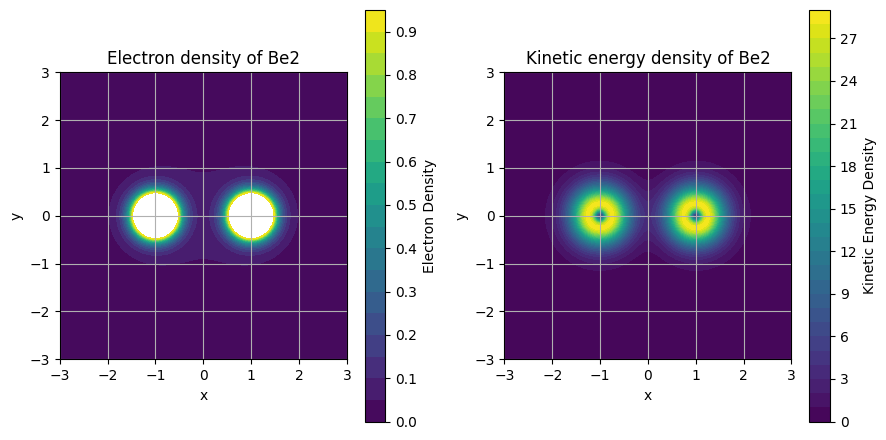

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have defined X, Y, rho, and grad_rho appropriately

# Set contour levels for electron density and kinetic energy density
density_levels = np.arange(0, 1, 0.05)
ked_levels = np.arange(0, 30, 1)
# Create a new figure with two subplots
fig = plt.figure(figsize=(9, 4.5))

# Add electron density subplot
ax1 = fig.add_subplot(121)
density_plot = ax1.contourf(X, Y, rho.reshape(X.shape), levels=density_levels)
ax1.set_title('Electron density of Be2')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_aspect('equal')
ax1.grid(True)
fig.colorbar(density_plot, ax=ax1, label='Electron Density')

# Add kinetic energy density subplot
ax2 = fig.add_subplot(122)
ked_plot = ax2.contourf(X, Y, ked.reshape(X.shape), levels=ked_levels)
ax2.set_title('Kinetic energy density of Be2')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_aspect('equal')
ax2.grid(True)
fig.colorbar(ked_plot, ax=ax2, label='Kinetic Energy Density')

# Adjust layout to prevent overlapping of labels
plt.tight_layout()

# Show the figure
plt.show()

## Intensive properties

Intensive properties are those that do not depend on the number of atoms in the molecule. Promolecular intensive properties are computed following the next equation:

\begin{equation*}
\langle P \rangle_p =  \left(\frac{1}{n}\sum_{k=1}^n P_k^p \right)^{\tfrac{1}{p}}
\end{equation*}

where $P_k^p$ are the atomic property values and $p$ is the power of the average. The following block of code shows how to compute some molecular intensive properties for the Berillium dimer.

In [6]:
print("Promolecule Intensive properties:")
print(f"Molecular spin number \t{be2_promol.nspin()}")
print(f"Ionization potential (eV) \t{be2_promol.ip(p=1):.6f}")

Promolecule Intensive properties:
Molecular spin number 	0.0
Ionization potential (eV) 	0.309269
